# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
## 超參數設定
"""
Set your required experiment parameters
"""
LR = [0.001, 0.01, 0.1]
LEARNING_RATE = 1e-1
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
results = {}

In [19]:
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
def TrainModel(optimizer, name, lr):
    #keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    ##optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
            epochs=EPOCHS, 
            batch_size=BATCH_SIZE, 
            validation_data=(x_test, y_test), 
            shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    results[name+' - '+ str(lr)] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

In [20]:
for lr in LR:
    TrainModel(keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM), 'SGD', lr)
for lr in LR:
    TrainModel(keras.optimizers.RMSprop(lr=lr), 'RMSprop', lr)
for lr in LR:
    TrainModel(keras.optimizers.Adagrad(lr=lr), 'Adagrad', lr)
for lr in LR:
    TrainModel(keras.optimizers.Adam(lr=lr), 'Adam', lr)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.8892 - acc: 0.3168 - val_loss: 1.7174 - val_acc: 0.3871
Epoch 2/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.6688 - acc: 0.4034 - val_loss: 1.5981 - val_acc: 0.4280
Epoch 3/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.6012 - acc: 0.4275 - val_loss: 1.5669 - val_acc: 0.4413
Epoch 4/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.5411 - acc: 0.4502 - val_loss: 1.5775 - val_acc: 0.4392
Epoch 5/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.4898 - acc: 0.4686 - val_loss: 1.5112 - val_acc: 0.4666
Epoch 6/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.4581 - acc: 0.4763 - val_loss: 1.4999 - val_acc: 0.4542
Epoch 7/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.4133 - acc: 0.4942 - val_loss: 1.4205 - va

50000/50000 [==============================] - 5s 100us/step - loss: 1.9425 - acc: 0.2699 - val_loss: 1.9305 - val_acc: 0.2592
Epoch 3/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.9300 - acc: 0.2727 - val_loss: 1.9141 - val_acc: 0.2903
Epoch 4/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.9090 - acc: 0.2869 - val_loss: 1.9676 - val_acc: 0.2769
Epoch 5/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.9256 - acc: 0.2796 - val_loss: 1.9295 - val_acc: 0.2809
Epoch 6/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.9089 - acc: 0.2861 - val_loss: 1.8885 - val_acc: 0.2862
Epoch 7/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.9238 - acc: 0.2807 - val_loss: 1.9574 - val_acc: 0.2766
Epoch 8/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.8977 - acc: 0.2919 - val_loss: 1.8496 - val_acc: 0.2907
Epoch 9/50
50000/50000 [=======================

50000/50000 [==============================] - 6s 126us/step - loss: 1.7879 - acc: 0.3569 - val_loss: 1.7612 - val_acc: 0.3721
Epoch 4/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.7227 - acc: 0.3837 - val_loss: 1.8365 - val_acc: 0.3449
Epoch 5/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6641 - acc: 0.4046 - val_loss: 1.7575 - val_acc: 0.3828
Epoch 6/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.6162 - acc: 0.4240 - val_loss: 1.6344 - val_acc: 0.4154
Epoch 7/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.5734 - acc: 0.4377 - val_loss: 1.6949 - val_acc: 0.4019
Epoch 8/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.5469 - acc: 0.4482 - val_loss: 1.5777 - val_acc: 0.4399
Epoch 9/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.5100 - acc: 0.4601 - val_loss: 1.5920 - val_acc: 0.4254
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 6s 125us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 125us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 125us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 125us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 6s 125us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 6s 126us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 6s 125us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [=====

Epoch 5/50
50000/50000 [==============================] - 6s 126us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 126us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 126us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 6s 127us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 6s 127us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 6s 126us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 6s 128us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/

Epoch 6/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.6185 - acc: 0.4339 - val_loss: 1.6360 - val_acc: 0.4198
Epoch 7/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.5933 - acc: 0.4428 - val_loss: 1.6190 - val_acc: 0.4211
Epoch 8/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.5729 - acc: 0.4502 - val_loss: 1.5798 - val_acc: 0.4446
Epoch 9/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.5548 - acc: 0.4572 - val_loss: 1.5770 - val_acc: 0.4444
Epoch 10/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.5390 - acc: 0.4617 - val_loss: 1.5691 - val_acc: 0.4507
Epoch 11/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.5252 - acc: 0.4674 - val_loss: 1.5429 - val_acc: 0.4574
Epoch 12/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.5090 - acc: 0.4722 - val_loss: 1.5325 - val_acc: 0.4589
Epoch 13/50
50000/50000 [======

50000/50000 [==============================] - 6s 115us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 6s 115us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 6s 116us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 6s 115us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 6s 115us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 6s 116us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 6s 115us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==

Epoch 8/50
50000/50000 [==============================] - 6s 118us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 6s 118us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 6s 120us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 6s 119us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 6s 119us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 6s 120us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 6s 119us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/50
500

Epoch 9/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.3630 - acc: 0.5148 - val_loss: 1.4362 - val_acc: 0.4888
Epoch 10/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.3422 - acc: 0.5225 - val_loss: 1.4144 - val_acc: 0.4980
Epoch 11/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.3208 - acc: 0.5302 - val_loss: 1.4171 - val_acc: 0.5007
Epoch 12/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.2900 - acc: 0.5384 - val_loss: 1.4295 - val_acc: 0.4924
Epoch 13/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.2751 - acc: 0.5440 - val_loss: 1.3919 - val_acc: 0.5088
Epoch 14/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.2436 - acc: 0.5570 - val_loss: 1.4131 - val_acc: 0.4996
Epoch 15/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.2195 - acc: 0.5644 - val_loss: 1.3663 - val_acc: 0.5213
Epoch 16/50
50000/50000 [===

50000/50000 [==============================] - 7s 148us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 8s 151us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 7s 149us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 7s 149us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 7s 148us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/50
50000/50000 [==============================] - 7s 148us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/50
50000/50000 [==============================] - 7s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/50
50000/50000 [

Epoch 11/50
50000/50000 [==============================] - 7s 149us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 7s 149us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 7s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 8s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/50
50000/50000 [==============================] - 8s 153us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/50
50000/50000 [==============================] - 8s 151us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/50
50000/50000 [==============================] - 8s 153us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/50
5

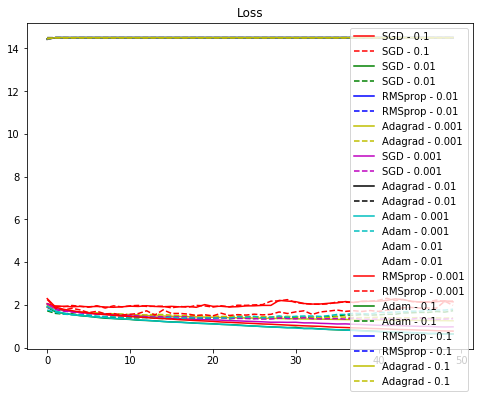

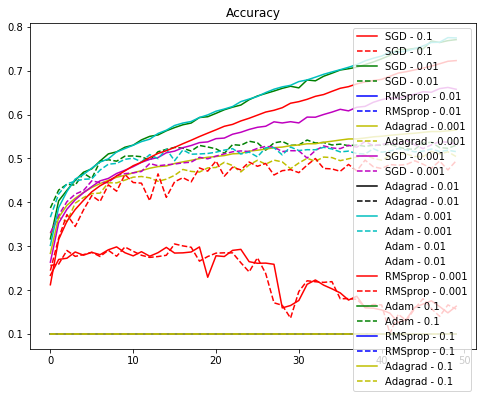

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k", "c", "w"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i%8])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i%8])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i%8])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i%8])
plt.title("Accuracy")
plt.legend()
plt.show()